## Семинар 1 "Полносвязные нейронные сети"

ФИО: 

В этом задании вам предстоит реализовать проход "вперед" для полносвязной нейронную сети. В дальнейшем мы реализуем процедуру обучения и научим сеть распознавать рукописные цифры.

На первой лекции мы познакомились с тем, что такое нейронные сети и изучили три слоя — линейный, сигмоида и SoftMax. Из этих слоев можно составлять глубокие архитектуры и обучать их при помощи градиентного спуска. Чтобы конструировать сложные архитектуры, можно реализовать каждый тип слоя как отдельный "кирпичик" и затем собирать полную архитектуру как конструктор. Это мы и попробуем сделать на первом и втором семинарах.

Каждый тип слоя мы будем реализовывать при помощи класса, который будет поддерживать три функции: forward, которая будет применять функцию, реализуемую слоем, к входной матрице и backward, которая будет вычислять градиенты и step, которая будет обновлять веса. Чтобы не применять функцию к каждому объекту в отдельности, мы будем подавать на вход слою матрицу размера (N, d), где N — количество объектов, а d — размерность каждого объекта.

<img src=backprop.pdf width=400>

Функция forward будет вычислять по $x$ значение $y$, backward — по $\frac{\partial L}{\partial y}$ вычислять $\frac{\partial L}{\partial x}$ и обновлять внутри себя $\frac{\partial L}{\partial w}$.

In [2]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [3]:
#мои велосипеды

In [4]:
vect = np.arange(0,3,1)

In [5]:
vect.shape

(3,)

In [6]:
mat=np.array([[ 5, 1 ,3], [ 1, 1 ,1], [ 1, 2 ,1]])

In [7]:
mat

array([[5, 1, 3],
       [1, 1, 1],
       [1, 2, 1]])

In [12]:
vect.ravel()

array([0, 1, 2])

In [13]:
mat.dot(vect.transpose())

array([7, 3, 4])

In [10]:
w =np.tensordot(vect, mat, axes=0).sum(axis=2).sum(axis=1)

In [19]:
np.dot(vect, mat)

array([3, 5, 3])

In [11]:
w

array([ 0, 16, 32])

In [14]:
np.tensordot(vect, mat, axes=0)

array([[[ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0]],

       [[ 5,  1,  3],
        [ 1,  1,  1],
        [ 1,  2,  1]],

       [[10,  2,  6],
        [ 2,  2,  2],
        [ 2,  4,  2]]])

In [73]:
X_te = np.array([[1,2,3],[4,5,6],[7,8,9]])

In [76]:
w

array([ 0, 16, 32])

In [75]:
X_te.T

array([[1, 4, 7],
       [2, 5, 8],
       [3, 6, 9]])

In [74]:
X_te.T.dot(w)

array([288, 336, 384])

In [ ]:
#конец

In [35]:
we = np.random.normal(0,0.1,(1,5))

In [56]:
we.shape

(1, 5)

In [37]:
mas = np.ones((5,5))

In [39]:
np.dot(we, mas).shape

(1, 5)

In [53]:
#mas.dot(we)

In [55]:
np.exp(we).shape

(1, 5)

### Часть 1: Линейный слой


In [49]:
class Linear:
    def __init__(self, input_size, output_size):
        '''
        Creates weights and biases for linear layer.
        Dimention of inputs is *input_size*, of output: *output_size*.
        '''
        #### YOUR CODE HERE
        #### Create weights, initialize them with samples from N(0, 0.1).
        self.N = input_size
        mu, sigma = 0, 0.1 # mean and standard deviation
        self.weights = np.random.normal(mu,sigma,(1,self.N))#shape(1,N)
        self.alpha = alpha#learning rate
        self.y =np.zeros((output_size))
        self.y_hat = np.zeros((output_size))
        self.dLdw = np.zeros((output_size))
        pass
    
    def forward(self, X):
        '''
        Passes objects through this layer.
        X is np.array of size (N, d)
        '''
        #### YOUR CODE HERE
        #### Apply layer to input 
        self.y = np.dot(self.weights, X)#<X_i,W_i>
        return self.y
    def backward(self, dLdy):
        '''
        1. Compute dLdw and dLdx.
        2. Store dLdw for step() call
        3. Return dLdx
        '''
        #### YOUR CODE HERE
        self.dLdw = np.dot(X,dLdy)
        dLdx = np.dot(self.weights, dLdy)
        return dLdx
        #pass
    
    def step(self, learning_rate):
        '''
        1. Apply gradient dLdw to network:
        w <- w - l*dLdw
        '''
        #### YOUR CODE HERE
        self.weights = self.weights - learning_rate*self.dLdw
        pass

### Часть 2: Сигмоида

In [61]:
class Sigmoid:
    def __init__(self):
        self.prob = 0.0
        self.weights =np.zeros(())
        self.dLdw = np.zeros(())
        pass
    
    def sigmoid_func(X):
        return 1/(1+np.exp(-X))
    
    def forward(self, X):
        '''
        Passes objects through this layer.
        X is np.array of size (N, d)
        '''
        #### YOUR CODE HERE
        #### Apply layer to input
        self.prob = sigmoid_func(X)
        return self.prob
    
    def backward(self, dLdy, weights):
        '''
        1. Compute dLdx.
        2. Return dLdx
        '''
        #### YOUR CODE HERE
        self.dLdw = np.dot(X, dLdy)
        dLdx = np.dot(weights, dLdy)
        self.weights = weights
        return dLdx
        #pass
    
    def step(self, learning_rate):
        self.weights = self.weights - learning_rate*self.dLdw
        pass

### Часть 3: Функция потерь

Как мы увидели на семинаре, вычисление производной для связки SoftMax + Negative log-likelihood проще чем для этих двух слоев по отдельности. Поэтому мы реализуем их как один класс. Важное замечание: на проходе "вперед" важно воспользоваться трюком <a href="https://hips.seas.harvard.edu/blog/2013/01/09/computing-log-sum-exp/">log-sum-exp</a>, чтобы не столкнуться с численными неустойчивостями.

In [62]:
class NLLLoss:
    def __init__(self):
        '''
        Applies Softmax operation to inputs and computes NLL loss
        '''
        #### YOUR CODE HERE
        #### (Hint: No code is expected here, just joking)
        self.L=np.zeros(())#it's vector
        self.y = np.zeros(())
        pass
    
    def forward(self, X, y):
        '''
        Passes objects through this layer.
        X is np.array of size (N, d)
        y is np.array of size (N), contains correct labels
        '''
        #### YOUR CODE HERE
        #### Apply layer to input
        a = X.max()
        N = X.shape[0]
        self.y = y
        self.L = np.sum(X/(np.log(np.exp(X - a).sum())+a), axis =0)
        return self.L
        
        pass
    
    def backward(self):
        '''
        Note that here dLdy = 1 since L = y
        1. Compute dLdx
        2. Return dLdx
        '''
        #### YOUR CODE HERE
        return self.L-self.y
        #pass

### Часть 4, нейронная сеть

Теперь, когда у нас есть "кирпичики", мы можем написать класс, который будет собирать всю сеть вместе 

In [147]:
a = Linear(2,10,0.1)

In [148]:
dic = {'Linear':[2,10,1]}

In [149]:
for item in dic.values():
    print (item)

[2, 10, 1]


In [150]:
for (module,value) in zip(dic.keys(),dic.values()):
    print(module, value[0])

Linear 2


In [151]:
model_list=[]

In [152]:
model_list.append(Linear(2,10,1))

In [154]:
for model in model_list:
    model.forward(X_te)

In [51]:
class NeuralNetwork:
    def __init__(modules):
        '''
        Constructs network with *modules* as its layers
        '''
        #### YOUR CODE HERE
        self.model_list=[]
        for (module,value) in zip(modules.keys(),modules.values()):
            if module =='Linear':
                self.model_list.append(Linear(value[0],value[1]))
            if module =='Sigmoid':
                self.model_list.append(Sigmoid())
            if module =='NLLLoss':
                self.model_list.append(NLLLoss(value[0]));
        pass
    
    def forward(self, X):
        #### YOUR CODE HERE
        #### Apply layers to input
        
        if len(self.model_list==5):
            dLdx = model[4].forward(model[3].forward(model[2].forward(model[1].forward(model[0].forward(X)))))
            
        else:
            print('Not appropriate architecture')
        pass
    
    def backward(dLdy):
        '''
        dLdy here is a gradient from loss function
        '''
        #### YOUR CODE HERE
        self.dLdw = np.dot(X,dLdy)
        dLdx = np.dot(self.weights, dLdy)
        pass
    
    def step(learning_rate):
        self.weights = self.weights - learning_rate*self.dLdw
        pass

### Часть 5, обучение на простых данных

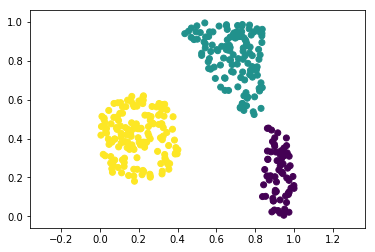

In [52]:
data = np.load('data.npz')
X, y = data['arr_0'], data['arr_1']
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.axis('equal')
plt.show()

Обучите архитектуру вида 2 -> 10 -> 10 -> 3:
* Linear(2, 10)
* Sigmoid()
* Linear(10, 10)
* Sigmoid()
* Linear(10, 3)

В качестве функции потерь используйте NLLLoss.
1. Создайте сеть, в цикле запускайте forward, backward, step (используйте learning rate 0.01). 
2. Нарисуйте график сходимости (изменение NLL со временем).
3. Нарисуйте разделяющую поверхность

Отличная визуализация: http://playground.tensorflow.org/

In [ ]:
### YOUR CODE HERE:

